# Carga de Datos

In [64]:
# Agregar desarrollo aquí.
data_values=pd.read_excel('G:\Proyect\Azzorti\BASES_MODELO.xlsx',sheet_name='BASE_VARIABLES')
data_asesor = pd.read_excel('G:\Proyect\Azzorti\BASES_MODELO.xlsx',sheet_name='BASE_ASESORA')
data_fitted = pd.read_excel('G:\Proyect\Azzorti\BASES_MODELO.xlsx',sheet_name='BASE_ESTIMADOS')


# Union de tablas

In [65]:
data_values= pd.merge(data_values, data_fitted[['CODIGO_DEL_PRODUCTO','CANTIDADES_ESTIMADAS']],on='CODIGO_DEL_PRODUCTO',how='left')
data_values=pd.merge(data_values, data_asesor,on='CAMPANA',how='left')

In [66]:
data_values['CAMPANA']=pd.to_datetime(data_values['CAMPANA'],format='%Y%m')
data_values['CAMPANA']=data_values['CAMPANA'].dt.strftime('%Y-%m')

In [67]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817 entries, 0 to 5816
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CAMPANA               5817 non-null   object 
 1   CODIGO_DEL_PRODUCTO   5817 non-null   object 
 2   VENTA                 5817 non-null   int64  
 3   VENTA_ZONA_101        5817 non-null   int64  
 4   VENTA_ZONA_102        5817 non-null   int64  
 5   VENTA_ZONA_103        5817 non-null   int64  
 6   VENTA_ZONA_104        5817 non-null   int64  
 7   VENTA_ZONA_107        5817 non-null   int64  
 8   VENTA_ZONA_109        5817 non-null   int64  
 9   VENTA_ZONA_110        5817 non-null   int64  
 10  VENTA_ZONA_111        5817 non-null   int64  
 11  VENTA_ZONA_112        5817 non-null   int64  
 12  VENTA_ZONA_115        5817 non-null   int64  
 13  VENTA_ZONA_116        5817 non-null   int64  
 14  VENTA_ZONA_119        5817 non-null   int64  
 15  NOMB_SUBGRUPO        

# Data Transformation

In [68]:
data_values.drop(columns='CODIGO_DEL_PRODUCTO',axis=1,inplace=True)

In [69]:
data_values

,CAMPANA,VENTA,VENTA_ZONA_101,VENTA_ZONA_102,VENTA_ZONA_103,VENTA_ZONA_104,VENTA_ZONA_107,VENTA_ZONA_109,VENTA_ZONA_110,VENTA_ZONA_111,...,N° ASESORAS_ZONA_104,N° ASESORAS_ZONA_107,N° ASESORAS_ZONA_109,N° ASESORAS_ZONA_110,N° ASESORAS_ZONA_111,N° ASESORAS_ZONA_112,N° ASESORAS_ZONA_115,N° ASESORAS_ZONA_116,N° ASESORAS_ZONA_119,N° ASESORAS
0,2019-02,25,0,0,0,0,0,0,0,0,...,277,511,449,455,434,457,376,556,389,22840
1,2019-08,25,0,0,0,0,0,0,0,0,...,367,601,562,450,537,463,463,730,497,26461
2,2019-10,25,0,0,0,0,0,0,0,0,...,369,523,564,492,537,460,460,706,323,26072
3,2019-07,25,0,0,0,0,0,0,0,0,...,368,568,551,462,504,464,441,727,477,26654
4,2019-03,25,0,0,0,0,0,0,0,0,...,281,565,467,399,491,498,437,587,402,23832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5812,2019-02,28597,162,216,0,0,0,0,0,162,...,277,511,449,455,434,457,376,556,389,22840
5813,2019-02,30571,1140,1026,589,266,1083,456,361,285,...,277,511,449,455,434,457,376,556,389,22840
5814,2019-01,31242,1842,1588,3112,508,1207,381,699,254,...,289,542,483,421,521,514,431,675,419,24133
5815,2019-02,33212,969,760,760,361,418,912,304,456,...,277,511,449,455,434,457,376,556,389,22840


In [70]:
df_unique=pd.DataFrame({'Names':data_values.columns,'Values':[data_values[i].unique().size for i in data_values.columns]})
df_unique

,Names,Values
0,CAMPANA,12
1,VENTA,2014
2,VENTA_ZONA_101,177
3,VENTA_ZONA_102,134
4,VENTA_ZONA_103,127
5,VENTA_ZONA_104,80
6,VENTA_ZONA_107,151
7,VENTA_ZONA_109,129
8,VENTA_ZONA_110,104
9,VENTA_ZONA_111,108


In [71]:
data_values.to_excel('DW.xlsx')

In [72]:
data_values['Month']=pd.to_datetime(data_values['CAMPANA'],format='%Y-%m').dt.month_name()

# Data Featuring

In [73]:
df_total_sales= data_values.groupby(['CAMPANA','VENTA','NOMB_SUBGRUPO','TALLA','PRECIO_NAC','CANTIDADES_ESTIMADAS','N° ASESORAS'])[['VENTA_ZONA_101','VENTA_ZONA_102','VENTA_ZONA_103','VENTA_ZONA_104','VENTA_ZONA_107','VENTA_ZONA_109','VENTA_ZONA_110','VENTA_ZONA_111','VENTA_ZONA_112','VENTA_ZONA_115','VENTA_ZONA_116','VENTA_ZONA_119']].sum().reset_index()

In [74]:
df_total_sales

,CAMPANA,VENTA,NOMB_SUBGRUPO,TALLA,PRECIO_NAC,CANTIDADES_ESTIMADAS,N° ASESORAS,VENTA_ZONA_101,VENTA_ZONA_102,VENTA_ZONA_103,VENTA_ZONA_104,VENTA_ZONA_107,VENTA_ZONA_109,VENTA_ZONA_110,VENTA_ZONA_111,VENTA_ZONA_112,VENTA_ZONA_115,VENTA_ZONA_116,VENTA_ZONA_119
0,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-01,51,215 RE-FALDAS FEM,T-S,99.9,43,24133,0,0,0,0,0,0,0,0,51,0,0,0
2,2019-01,57,224 RE-SOBRETODOS FEM,T-M,109.9,139,24133,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-01,64,204 RE-BUZOS FEM,T-L,119.9,83,24133,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-01,83,225 RE-VESTIDOS FEM,T-S,149.9,64,24133,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5812,2019-12,12134,201 RE-BLUSAS FEM,T-L,119.9,10193,25126,248,495,165,83,330,83,248,248,330,165,743,248
5813,2019-12,14034,225 RE-VESTIDOS FEM,T-XL,89.9,28207,25126,318,318,254,0,318,318,127,191,254,318,445,127
5814,2019-12,14616,201 RE-BLUSAS FEM,T-XL,59.9,13008,25126,444,355,400,0,89,311,267,400,178,400,578,222
5815,2019-12,14862,211 RE-CHAQUETAS FEM,T-XS,139.9,34182,25126,95,762,191,95,381,381,95,0,191,572,95,0


In [75]:
df_melted_sales=df_total_sales.melt(id_vars=['CAMPANA','VENTA','NOMB_SUBGRUPO','TALLA','PRECIO_NAC','CANTIDADES_ESTIMADAS','N° ASESORAS'],var_name='ZONA',value_name='SUM_SALES')


In [76]:
df_melted_sales

,CAMPANA,VENTA,NOMB_SUBGRUPO,TALLA,PRECIO_NAC,CANTIDADES_ESTIMADAS,N° ASESORAS,ZONA,SUM_SALES
0,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,VENTA_ZONA_101,0
1,2019-01,51,215 RE-FALDAS FEM,T-S,99.9,43,24133,VENTA_ZONA_101,0
2,2019-01,57,224 RE-SOBRETODOS FEM,T-M,109.9,139,24133,VENTA_ZONA_101,0
3,2019-01,64,204 RE-BUZOS FEM,T-L,119.9,83,24133,VENTA_ZONA_101,0
4,2019-01,83,225 RE-VESTIDOS FEM,T-S,149.9,64,24133,VENTA_ZONA_101,0
...,...,...,...,...,...,...,...,...,...
69799,2019-12,12134,201 RE-BLUSAS FEM,T-L,119.9,10193,25126,VENTA_ZONA_119,248
69800,2019-12,14034,225 RE-VESTIDOS FEM,T-XL,89.9,28207,25126,VENTA_ZONA_119,127
69801,2019-12,14616,201 RE-BLUSAS FEM,T-XL,59.9,13008,25126,VENTA_ZONA_119,222
69802,2019-12,14862,211 RE-CHAQUETAS FEM,T-XS,139.9,34182,25126,VENTA_ZONA_119,0


In [77]:
df_melted_sales['ZONA']=df_melted_sales['ZONA'].str.replace('VENTA_ZONA_','').astype(object)

In [78]:
df_melted_sales

,CAMPANA,VENTA,NOMB_SUBGRUPO,TALLA,PRECIO_NAC,CANTIDADES_ESTIMADAS,N° ASESORAS,ZONA,SUM_SALES
0,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0
1,2019-01,51,215 RE-FALDAS FEM,T-S,99.9,43,24133,101,0
2,2019-01,57,224 RE-SOBRETODOS FEM,T-M,109.9,139,24133,101,0
3,2019-01,64,204 RE-BUZOS FEM,T-L,119.9,83,24133,101,0
4,2019-01,83,225 RE-VESTIDOS FEM,T-S,149.9,64,24133,101,0
...,...,...,...,...,...,...,...,...,...
69799,2019-12,12134,201 RE-BLUSAS FEM,T-L,119.9,10193,25126,119,248
69800,2019-12,14034,225 RE-VESTIDOS FEM,T-XL,89.9,28207,25126,119,127
69801,2019-12,14616,201 RE-BLUSAS FEM,T-XL,59.9,13008,25126,119,222
69802,2019-12,14862,211 RE-CHAQUETAS FEM,T-XS,139.9,34182,25126,119,0


In [79]:
df_total_asesor=data_values.groupby(['CAMPANA','VENTA','NOMB_SUBGRUPO','TALLA','PRECIO_NAC','CANTIDADES_ESTIMADAS','N° ASESORAS'])[['N° ASESORAS_ZONA_101','N° ASESORAS_ZONA_102','N° ASESORAS_ZONA_103','N° ASESORAS_ZONA_104','N° ASESORAS_ZONA_107','N° ASESORAS_ZONA_109','N° ASESORAS_ZONA_110','N° ASESORAS_ZONA_111','N° ASESORAS_ZONA_112','N° ASESORAS_ZONA_115','N° ASESORAS_ZONA_116','N° ASESORAS_ZONA_119']].sum().reset_index()

In [80]:
df_total_asesor

,CAMPANA,VENTA,NOMB_SUBGRUPO,TALLA,PRECIO_NAC,CANTIDADES_ESTIMADAS,N° ASESORAS,N° ASESORAS_ZONA_101,N° ASESORAS_ZONA_102,N° ASESORAS_ZONA_103,N° ASESORAS_ZONA_104,N° ASESORAS_ZONA_107,N° ASESORAS_ZONA_109,N° ASESORAS_ZONA_110,N° ASESORAS_ZONA_111,N° ASESORAS_ZONA_112,N° ASESORAS_ZONA_115,N° ASESORAS_ZONA_116,N° ASESORAS_ZONA_119
0,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,903,679,554,289,542,483,421,521,514,431,675,419
1,2019-01,51,215 RE-FALDAS FEM,T-S,99.9,43,24133,903,679,554,289,542,483,421,521,514,431,675,419
2,2019-01,57,224 RE-SOBRETODOS FEM,T-M,109.9,139,24133,903,679,554,289,542,483,421,521,514,431,675,419
3,2019-01,64,204 RE-BUZOS FEM,T-L,119.9,83,24133,903,679,554,289,542,483,421,521,514,431,675,419
4,2019-01,83,225 RE-VESTIDOS FEM,T-S,149.9,64,24133,903,679,554,289,542,483,421,521,514,431,675,419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5812,2019-12,12134,201 RE-BLUSAS FEM,T-L,119.9,10193,25126,804,779,529,318,502,463,457,492,417,437,710,347
5813,2019-12,14034,225 RE-VESTIDOS FEM,T-XL,89.9,28207,25126,804,779,529,318,502,463,457,492,417,437,710,347
5814,2019-12,14616,201 RE-BLUSAS FEM,T-XL,59.9,13008,25126,804,779,529,318,502,463,457,492,417,437,710,347
5815,2019-12,14862,211 RE-CHAQUETAS FEM,T-XS,139.9,34182,25126,804,779,529,318,502,463,457,492,417,437,710,347


In [81]:
df_melted_asesor=df_total_asesor.melt(id_vars=['CAMPANA','VENTA','NOMB_SUBGRUPO','TALLA','PRECIO_NAC','CANTIDADES_ESTIMADAS','N° ASESORAS'],var_name='ASESORA',value_name='SUM_ASESORAS')

In [82]:
df_melted_asesor

,CAMPANA,VENTA,NOMB_SUBGRUPO,TALLA,PRECIO_NAC,CANTIDADES_ESTIMADAS,N° ASESORAS,ASESORA,SUM_ASESORAS
0,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,N° ASESORAS_ZONA_101,903
1,2019-01,51,215 RE-FALDAS FEM,T-S,99.9,43,24133,N° ASESORAS_ZONA_101,903
2,2019-01,57,224 RE-SOBRETODOS FEM,T-M,109.9,139,24133,N° ASESORAS_ZONA_101,903
3,2019-01,64,204 RE-BUZOS FEM,T-L,119.9,83,24133,N° ASESORAS_ZONA_101,903
4,2019-01,83,225 RE-VESTIDOS FEM,T-S,149.9,64,24133,N° ASESORAS_ZONA_101,903
...,...,...,...,...,...,...,...,...,...
69799,2019-12,12134,201 RE-BLUSAS FEM,T-L,119.9,10193,25126,N° ASESORAS_ZONA_119,347
69800,2019-12,14034,225 RE-VESTIDOS FEM,T-XL,89.9,28207,25126,N° ASESORAS_ZONA_119,347
69801,2019-12,14616,201 RE-BLUSAS FEM,T-XL,59.9,13008,25126,N° ASESORAS_ZONA_119,347
69802,2019-12,14862,211 RE-CHAQUETAS FEM,T-XS,139.9,34182,25126,N° ASESORAS_ZONA_119,347


In [83]:
df_melted_asesor['ASESORA']=df_melted_asesor['ASESORA'].str.replace('N° ASESORAS_ZONA_','').astype(object)

In [84]:
df_final=pd.merge(df_melted_sales,df_melted_asesor,on=['CAMPANA','VENTA'])

In [85]:
df_final

,CAMPANA,VENTA,NOMB_SUBGRUPO_x,TALLA_x,PRECIO_NAC_x,CANTIDADES_ESTIMADAS_x,N° ASESORAS_x,ZONA,SUM_SALES,NOMB_SUBGRUPO_y,TALLA_y,PRECIO_NAC_y,CANTIDADES_ESTIMADAS_y,N° ASESORAS_y,ASESORA,SUM_ASESORAS
0,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,903
1,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,102,679
2,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,103,554
3,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,104,289
4,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,107,542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273099,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,216 RE-JEANS FEM,T-8,49.9,36221,25126,111,492
1273100,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,216 RE-JEANS FEM,T-8,49.9,36221,25126,112,417
1273101,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,216 RE-JEANS FEM,T-8,49.9,36221,25126,115,437
1273102,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,216 RE-JEANS FEM,T-8,49.9,36221,25126,116,710


In [86]:
df_final.drop(columns={'NOMB_SUBGRUPO_y','TALLA_y','PRECIO_NAC_y','CANTIDADES_ESTIMADAS_y','N° ASESORAS_y'},axis=1,inplace=True)

In [87]:
df_final

,CAMPANA,VENTA,NOMB_SUBGRUPO_x,TALLA_x,PRECIO_NAC_x,CANTIDADES_ESTIMADAS_x,N° ASESORAS_x,ZONA,SUM_SALES,ASESORA,SUM_ASESORAS
0,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,101,903
1,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,102,679
2,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,103,554
3,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,104,289
4,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,107,542
...,...,...,...,...,...,...,...,...,...,...,...
1273099,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,111,492
1273100,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,112,417
1273101,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,115,437
1273102,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,116,710


In [88]:
df_final.rename(columns={'NOMB_SUBGRUPO_x':'SUBGRUPO','TALLA_x':'SIZE','PRECIO_NAC_x':'PRICE','CANTIDADES_ESTIMADAS_x':'PREDICTS_Q','N° ASESORAS_x':'NET_ASESOR'},inplace=True)

In [89]:
df_final

,CAMPANA,VENTA,SUBGRUPO,SIZE,PRICE,PREDICTS_Q,NET_ASESOR,ZONA,SUM_SALES,ASESORA,SUM_ASESORAS
0,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,101,903
1,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,102,679
2,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,103,554
3,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,104,289
4,2019-01,41,225 RE-VESTIDOS FEM,T-L,84.9,86,24133,101,0,107,542
...,...,...,...,...,...,...,...,...,...,...,...
1273099,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,111,492
1273100,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,112,417
1273101,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,115,437
1273102,2019-12,18111,216 RE-JEANS FEM,T-8,49.9,36221,25126,119,254,116,710


In [90]:
df_final['SUBGRUPO'].value_counts()

SUBGRUPO
201 RE-BLUSAS FEM        311760
216 RE-JEANS FEM         208800
225 RE-VESTIDOS FEM      187200
214 RE-ENTERIZOS FEM      83808
207 RE-CAMISETAS FEM      73440
211 RE-CHAQUETAS FEM      64800
220 RE-PANTALONES FEM     52848
204 RE-BUZOS FEM          46224
217 RE-JOGGERS FEM        41904
215 RE-FALDAS FEM         37008
223 RE-SHORTS FEM         31248
213 RE-CONJUNTOS FEM      25200
206 RE-CAMISAS FEM        22464
202 RE-BODYS FEM          22176
219 RE-OVEROLES FEM       18864
218 RE-LEGGINS FEM        14256
224 RE-SOBRETODOS FEM     13392
210 RE-CHALECOS FEM        8928
209 RE-CAPRIS FEM          4464
221 RE-PESCADORES FEM      4032
200 RE-PAQUETONES           288
Name: count, dtype: int64

In [91]:
subgrupo_dict = {
    "201 RE-BLUSAS FEM": "BLUSAS",
    "216 RE-JEANS FEM": "JEANS",
    "225 RE-VESTIDOS FEM": "VESTIDOS",
    "214 RE-ENTERIZOS FEM": "ENTERIZOS",
    "207 RE-CAMISETAS FEM": "CAMISETAS",
    "211 RE-CHAQUETAS FEM": "CHAQUETAS",
    "220 RE-PANTALONES FEM": "PANTALONES",
    "204 RE-BUZOS FEM": "BUZOS",
    "217 RE-JOGGERS FEM": "JOGGERS",
    "215 RE-FALDAS FEM": "FALDAS",
    "223 RE-SHORTS FEM": "SHORTS",
    "213 RE-CONJUNTOS FEM": "CONJUNTOS",
    "206 RE-CAMISAS FEM": "CAMISAS",
    "202 RE-BODYS FEM": "BODYS",
    "219 RE-OVEROLES FEM": "OVEROLES",
    "218 RE-LEGGINS FEM": "LEGGINS",
    "224 RE-SOBRETODOS FEM": "SOBRETODOS",
    "210 RE-CHALECOS FEM": "CHALECOS",
    "209 RE-CAPRIS FEM": "CAPRIS",
    "221 RE-PESCADORES FEM": "PESCADORES",
    "200 RE-PAQUETONES": "PAQUETONES"
}

df_final['SUBGRUPO'] = df_final['SUBGRUPO'].map(subgrupo_dict)

In [92]:
df_final

,CAMPANA,VENTA,SUBGRUPO,SIZE,PRICE,PREDICTS_Q,NET_ASESOR,ZONA,SUM_SALES,ASESORA,SUM_ASESORAS
0,2019-01,41,VESTIDOS,T-L,84.9,86,24133,101,0,101,903
1,2019-01,41,VESTIDOS,T-L,84.9,86,24133,101,0,102,679
2,2019-01,41,VESTIDOS,T-L,84.9,86,24133,101,0,103,554
3,2019-01,41,VESTIDOS,T-L,84.9,86,24133,101,0,104,289
4,2019-01,41,VESTIDOS,T-L,84.9,86,24133,101,0,107,542
...,...,...,...,...,...,...,...,...,...,...,...
1273099,2019-12,18111,JEANS,T-8,49.9,36221,25126,119,254,111,492
1273100,2019-12,18111,JEANS,T-8,49.9,36221,25126,119,254,112,417
1273101,2019-12,18111,JEANS,T-8,49.9,36221,25126,119,254,115,437
1273102,2019-12,18111,JEANS,T-8,49.9,36221,25126,119,254,116,710


In [93]:
df_final['SIZE'].value_counts()

SIZE
T-S      238896
T-M      233136
T-L      220752
T-XL     194112
T-10      69840
T-14      67392
T-12      65664
T-8       58320
T-XS      53568
T-16      34128
T-6       30240
T-XXL      6912
T-UNI       144
Name: count, dtype: int64

In [94]:
df_final['SIZE']=df_final['SIZE'].str.replace('T-','')

In [95]:
df_final

,CAMPANA,VENTA,SUBGRUPO,SIZE,PRICE,PREDICTS_Q,NET_ASESOR,ZONA,SUM_SALES,ASESORA,SUM_ASESORAS
0,2019-01,41,VESTIDOS,L,84.9,86,24133,101,0,101,903
1,2019-01,41,VESTIDOS,L,84.9,86,24133,101,0,102,679
2,2019-01,41,VESTIDOS,L,84.9,86,24133,101,0,103,554
3,2019-01,41,VESTIDOS,L,84.9,86,24133,101,0,104,289
4,2019-01,41,VESTIDOS,L,84.9,86,24133,101,0,107,542
...,...,...,...,...,...,...,...,...,...,...,...
1273099,2019-12,18111,JEANS,8,49.9,36221,25126,119,254,111,492
1273100,2019-12,18111,JEANS,8,49.9,36221,25126,119,254,112,417
1273101,2019-12,18111,JEANS,8,49.9,36221,25126,119,254,115,437
1273102,2019-12,18111,JEANS,8,49.9,36221,25126,119,254,116,710


In [96]:
df_final['CAMPANA'][0:1018484].count()/df_final['CAMPANA'][0:1273104].count()

0.8000006283854265

In [97]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273104 entries, 0 to 1273103
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   CAMPANA       1273104 non-null  object 
 1   VENTA         1273104 non-null  int64  
 2   SUBGRUPO      1273104 non-null  object 
 3   SIZE          1273104 non-null  object 
 4   PRICE         1273104 non-null  float64
 5   PREDICTS_Q    1273104 non-null  int64  
 6   NET_ASESOR    1273104 non-null  int64  
 7   ZONA          1273104 non-null  object 
 8   SUM_SALES     1273104 non-null  int64  
 9   ASESORA       1273104 non-null  object 
 10  SUM_ASESORAS  1273104 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 106.8+ MB


In [98]:
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [99]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)


# Exploratory Data Analysis

In [100]:
corr_matrix1 = df_final.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix1).head(10)

,variable_1,variable_2,r,abs_r
2,VENTA,PREDICTS_Q,0.860176,0.860176
12,PREDICTS_Q,VENTA,0.860176,0.860176
4,VENTA,SUM_SALES,0.582155,0.582155
24,SUM_SALES,VENTA,0.582155,0.582155
26,SUM_SALES,PREDICTS_Q,0.501141,0.501141
16,PREDICTS_Q,SUM_SALES,0.501141,0.501141
33,SUM_ASESORAS,NET_ASESOR,0.241341,0.241341
23,NET_ASESOR,SUM_ASESORAS,0.241341,0.241341
1,VENTA,PRICE,-0.124654,0.124654
6,PRICE,VENTA,-0.124654,0.124654


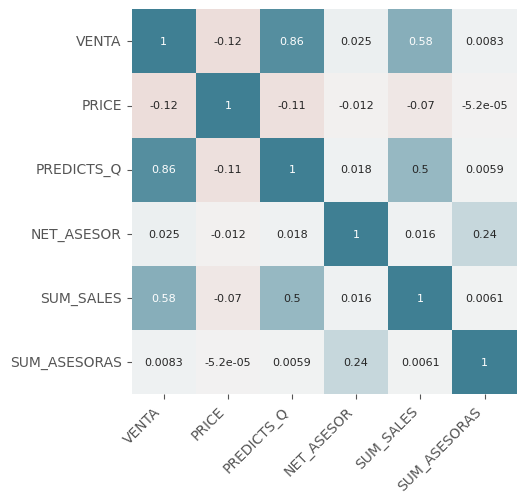

In [101]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix1,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Text(0.5, 0.98, 'Distribución variables numéricas')

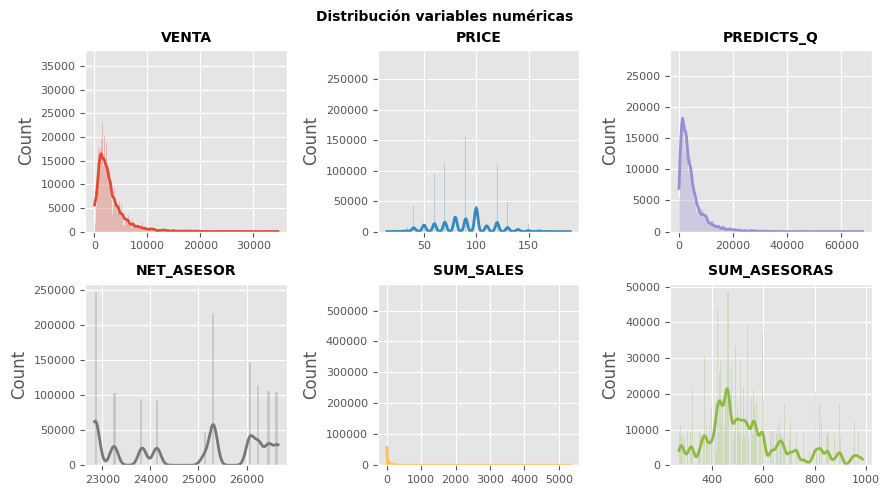

In [102]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_final.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_final,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

<Axes: xlabel='CAMPANA'>

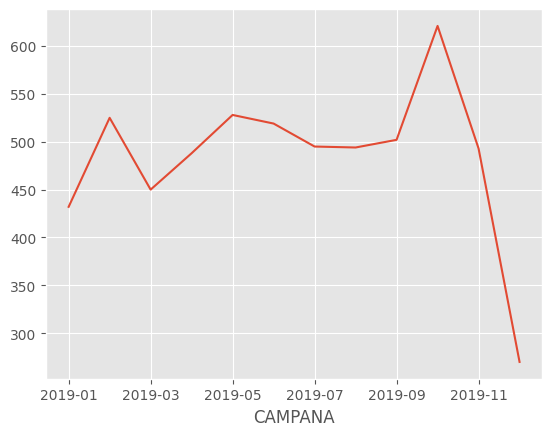

In [103]:
data_values.groupby('CAMPANA')['VENTA'].size().plot(kind='line')

<Axes: >

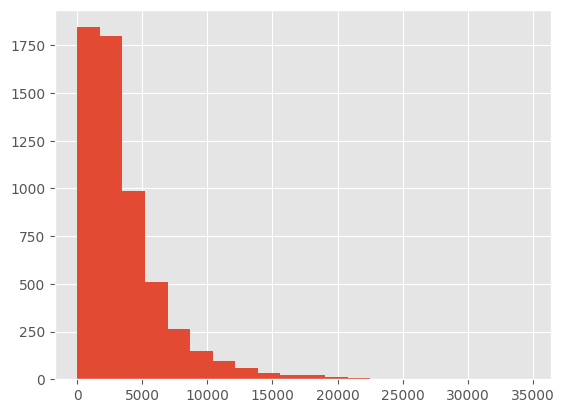

In [104]:
data_values['VENTA'].hist(bins=20)


<Axes: title={'center': 'VENTA'}, xlabel='Month'>

<Figure size 1500x3000 with 0 Axes>

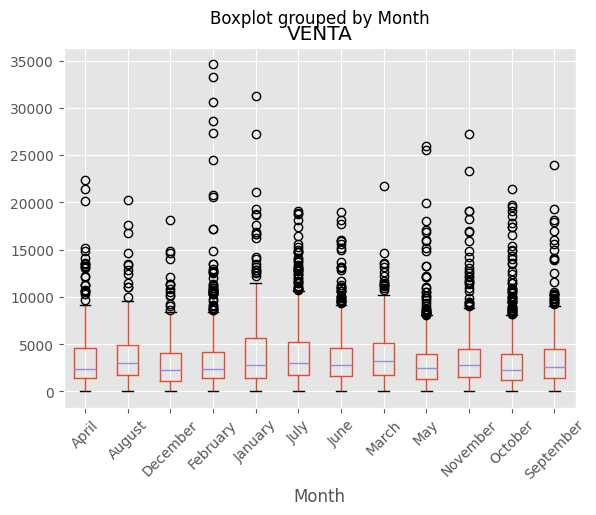

In [105]:
plt.figure(figsize=(15,30))
data_values.boxplot(column='VENTA',by='Month',rot=45)


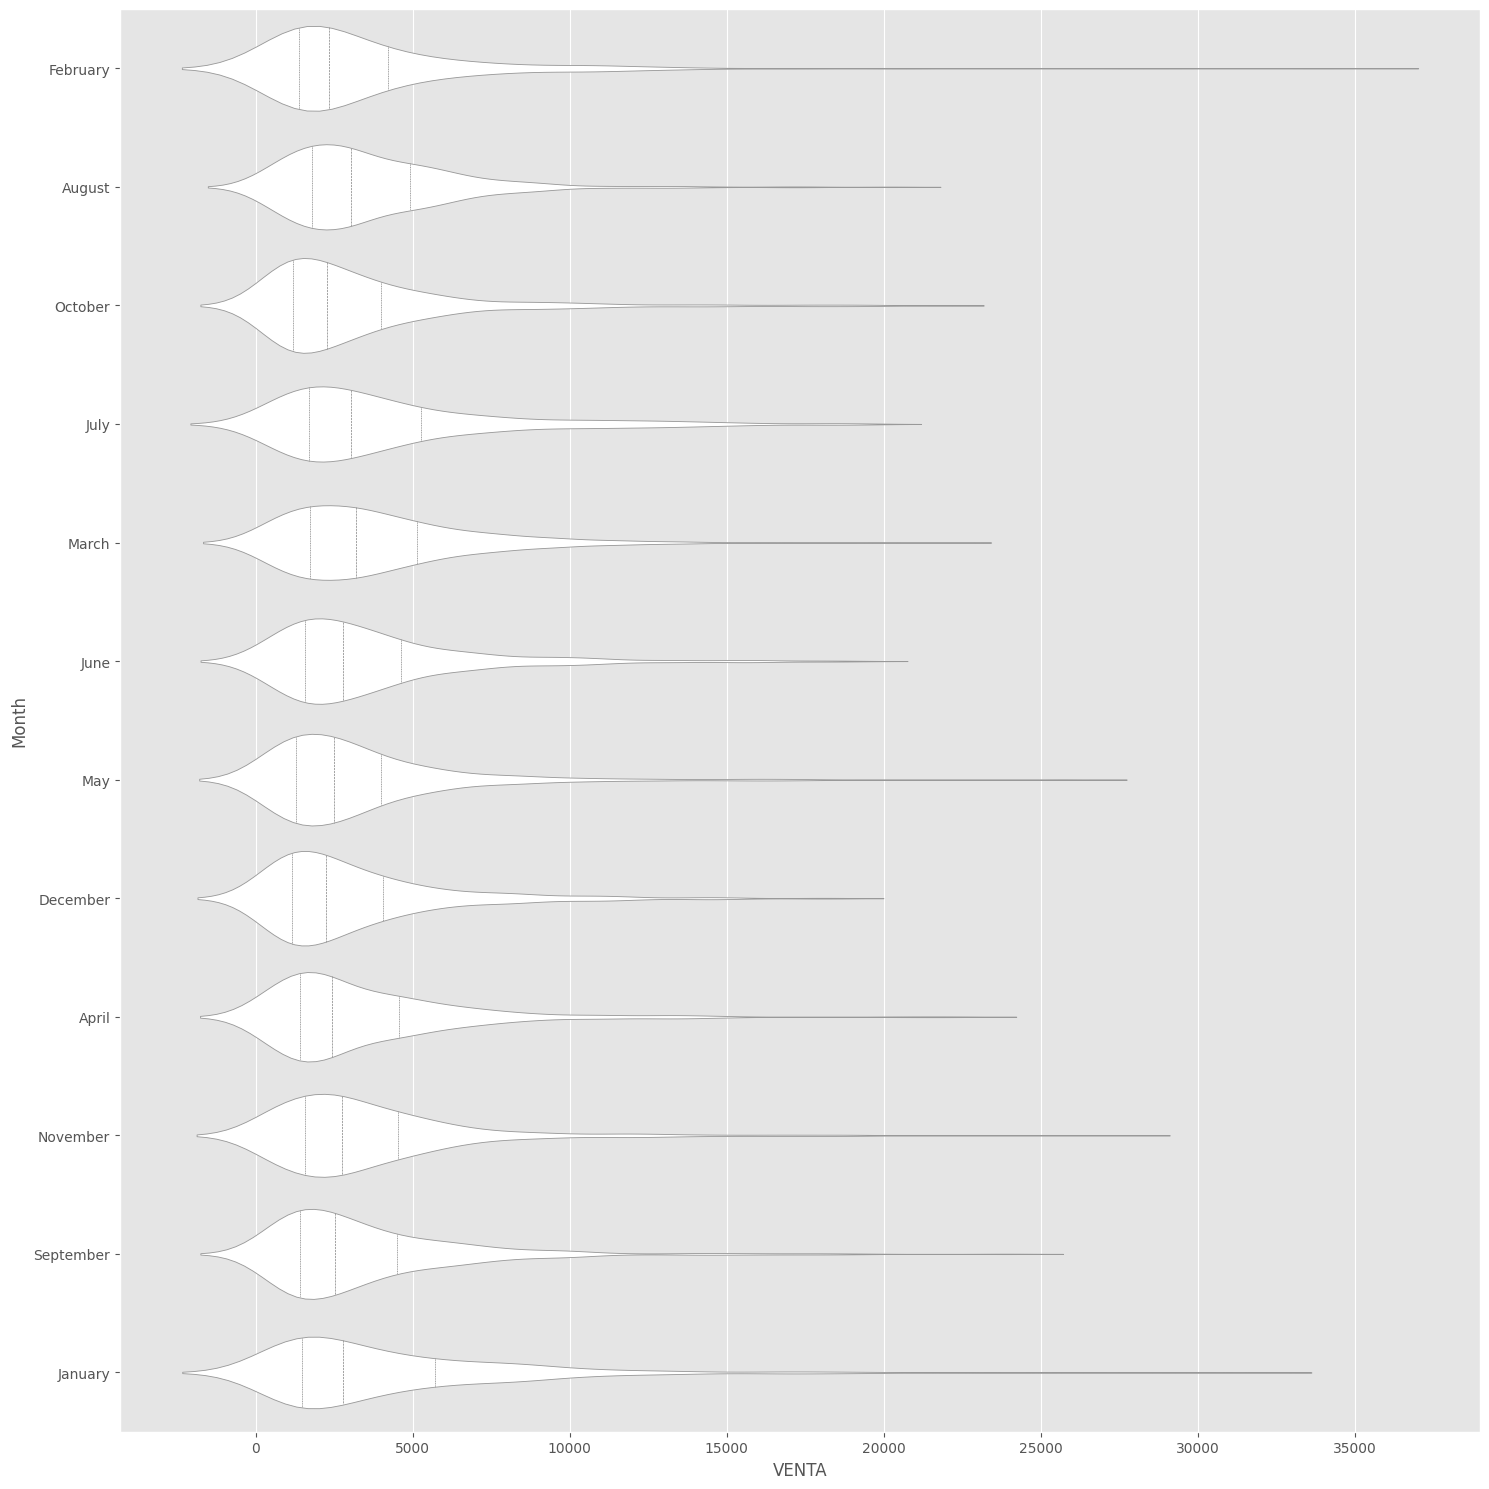

In [106]:
fig, ax = plt.subplots(figsize=(15,15))
sns.violinplot(data=data_values,x='VENTA',y='Month',ax=ax,inner='quartile',color='white')
plt.tight_layout()

# Model

In [107]:
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [108]:
X=df_final[['PRICE','NET_ASESOR','SUM_SALES','SUM_ASESORAS','PREDICTS_Q']]
y=df_final['VENTA']

## Cross Validation

In [109]:
X_train=X[0:1018484]
y_train=y[0:1018484]
X_test=X[1018484:1273104]
y_test=X[1018484:1273104]

# Linear Regression

In [110]:
X_train=sm.add_constant(X_train,prepend=True)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  VENTA   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                 6.797e+05
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:45:50   Log-Likelihood:            -8.8334e+06
No. Observations:             1018484   AIC:                         1.767e+07
Df Residuals:                 1018478   BIC:                         1.767e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          549.5345     25.286     21.733   

In [111]:
y_train = y_train.to_numpy().flatten()
prediccion_train = model.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

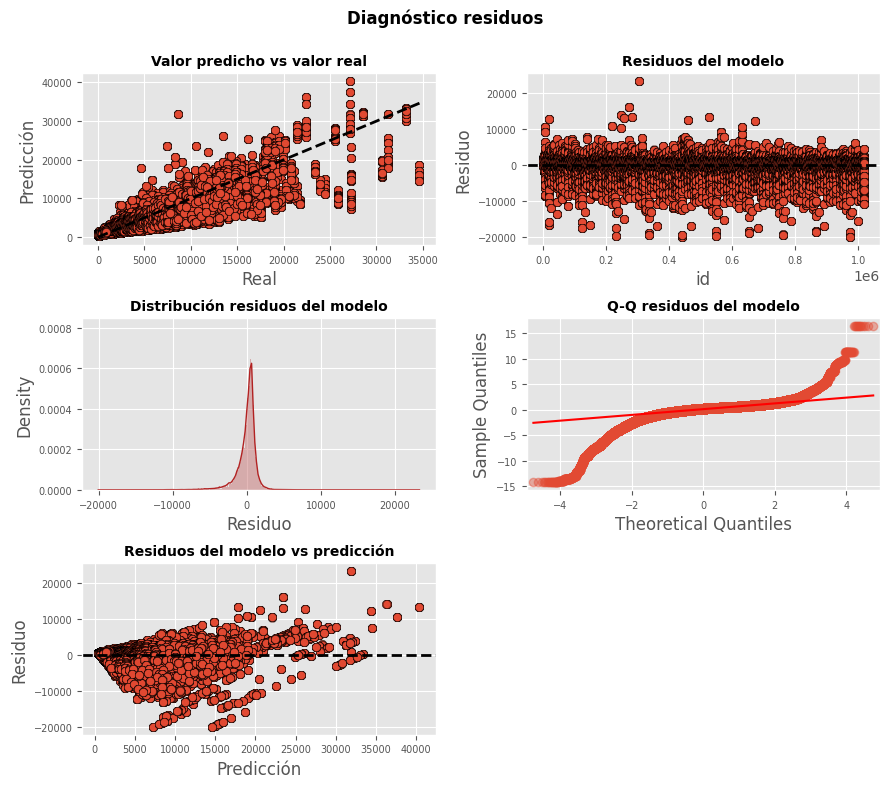

In [112]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [113]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.7717135548591614, pvalue=0.0)

In [114]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 683637.0480741815, p-value = 0.0


## Predictions

In [115]:
predicciones = model.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,738.914561,3.962930,731.147352,746.681771,-2032.509924,3510.339047
1,736.257887,2.479173,731.398792,741.116982,-2035.159974,3507.675748
2,734.775368,2.064505,730.729008,738.821728,-2036.641187,3506.191923
3,731.632427,2.905307,725.938124,737.326731,-2039.787024,3503.051879


# Decision Tree Forest

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [117]:
tree_model =DecisionTreeRegressor(max_depth=3,random_state=1)
tree_model.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=1)

Profundidad del árbol: 3
Número de nodos terminales: 8


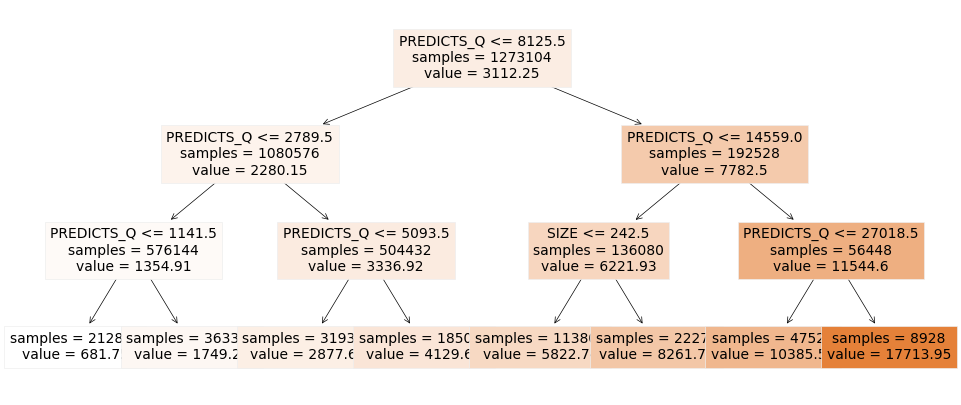

In [118]:


# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {tree_model.get_depth()}")
print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_model,
            feature_names = df_final.drop(columns = "VENTA").columns,
            class_names   = df_final.columns,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )



In [119]:
print("Regression coefficient:",tree_model.score(X,y))

Regression coefficient: 0.727570053151654


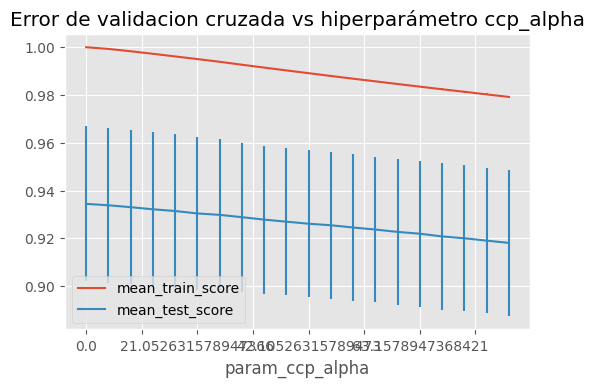

In [120]:
# Pruning (const complexity pruning) por validación cruzada
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

